In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [3]:
# Update pandas to display all columns in the output
pd.options.display.max_columns = None

In [1]:
data_path = '/kaggle/input/car-price-prediction/CarPrice_Assignment.csv'

In [2]:
data_path

'/kaggle/input/car-price-prediction/CarPrice_Assignment.csv'

# Load data into DataFrame

In [5]:
df = pd.read_csv(data_path)

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.shape

(205, 26)

There are 205 rows and 26 columns in the dataset.

In [8]:
# Check column names and data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

From above we can see that we have mixed data types for columns.

| DataType | Count
| :--- | ---:
| Numerical - Int | 8
| Numerical - Float | 8
| Categorical | 10

In [9]:
# Let's see unique values in each columns
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

From above, it is clear that 'car_ID' column can be dropped, because having unique value for each row doesn't help in inferences.

In [10]:
# Let's describe the data for numerical columns
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


From above, we can hint that few columns have outliers in it.

In [11]:
# Describe data for categorical columns
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [12]:
# Check for duplicates
df.duplicated().sum()

0

No row is duplicated in the dataset.

Now, let's drop first 'car_ID' column.

In [13]:
df.drop('car_ID', axis=1, inplace=True)

In [14]:
df.shape

(205, 25)

Let's check 'carname' column and see if we can fetch brand name from the name.

In [15]:
df['CarName'].head(10)

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
5                    audi fox
6                  audi 100ls
7                   audi 5000
8                   audi 4000
9         audi 5000s (diesel)
Name: CarName, dtype: object

Let's split the CarName values on space and take first word as brand name.

In [16]:
df['CarBrand'] = df.CarName.apply(lambda s: s.split()[0])

In [17]:
df["CarBrand"].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
maxda           2
renault         2
vw              2
mercury         1
toyouta         1
Nissan          1
porcshce        1
vokswagen       1
Name: CarBrand, dtype: int64

In [18]:
brand_map = {
    'toyouta':'toyota',
    'Nissan':'nissan',
    'maxda':'mazda',
    'vokswagen':'volkswagen',
    'vw':'volkswagen',
    'porcshce':'porsche'
}

In [19]:
df['CarBrand'] = df.CarBrand.apply(lambda s: brand_map[s] if s in brand_map else s)

In [20]:
df['CarBrand'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: CarBrand, dtype: int64

Now, we can remove column 'CarName'

In [21]:
df.drop('CarName', axis=1, inplace=True)

In [22]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [23]:
# Check if there are any missing values
df.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CarBrand            0
dtype: int64

From above, it is clear that there is no missing value in any column. 

In [24]:
df.loc[:,df.dtypes=='object'].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


## Plots for columns

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

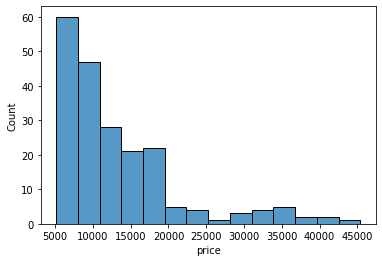

In [26]:
sns.histplot(df['price'])

<AxesSubplot:xlabel='price'>

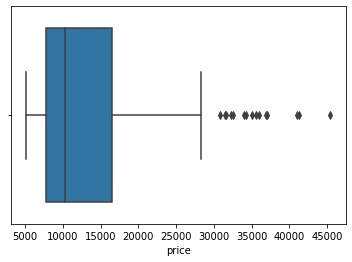

In [27]:
sns.boxplot(x=df['price'])

In [28]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

As above plots and description shows that Mean > Median, it is right skewed and there are few outliers because of which it is right skewed.

In [29]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarBrand'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='symboling', ylabel='count'>

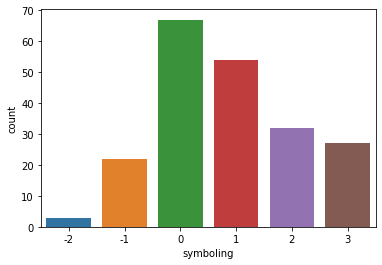

In [30]:
sns.countplot(df['symboling'])

<AxesSubplot:xlabel='symboling', ylabel='price'>

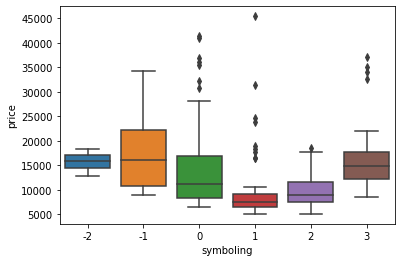

In [31]:
sns.boxplot(y='price', x='symboling', data=df)

It can be observed from plot that Car price varies on different values of symboling.

<AxesSubplot:xlabel='fueltype', ylabel='price'>

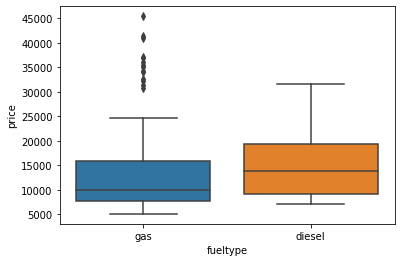

In [32]:
sns.boxplot(y='price', x='fueltype', data=df)

Car prices of fuel type 'gas' has lower prices compared to 'diesel' types.

<AxesSubplot:xlabel='aspiration', ylabel='price'>

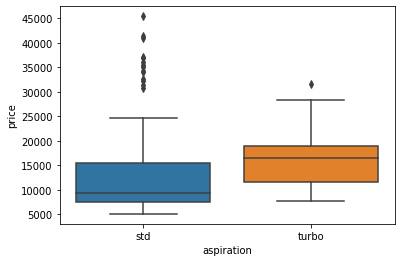

In [33]:
sns.boxplot(y='price', x='aspiration', data=df)

<AxesSubplot:>

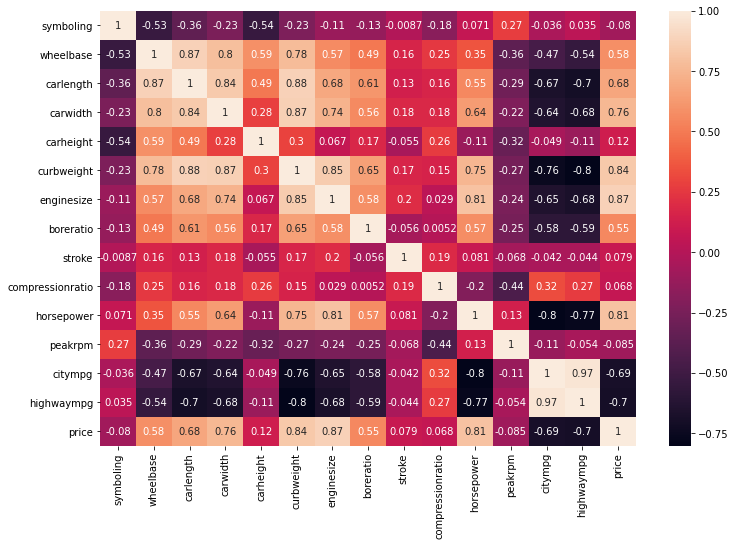

In [34]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [42]:
cat_cols = df.columns[df.dtypes.isin(['object', 'int64'])]
cat_cols

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'CarBrand'],
      dtype='object')

In [45]:
numerical_cols = df.columns[df.dtypes == 'float64']
numerical_cols

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price'],
      dtype='object')

## Plots for categorical features

In [46]:
print(f'Total categorical columns: {len(cat_cols)}')

Total categorical columns: 17


In [52]:
ncols = 4
nrows = int(np.ceil(len(cat_cols) / ncols))
total_cols = len(cat_cols)
print(total_cols, nrows, ncols)

17 5 4


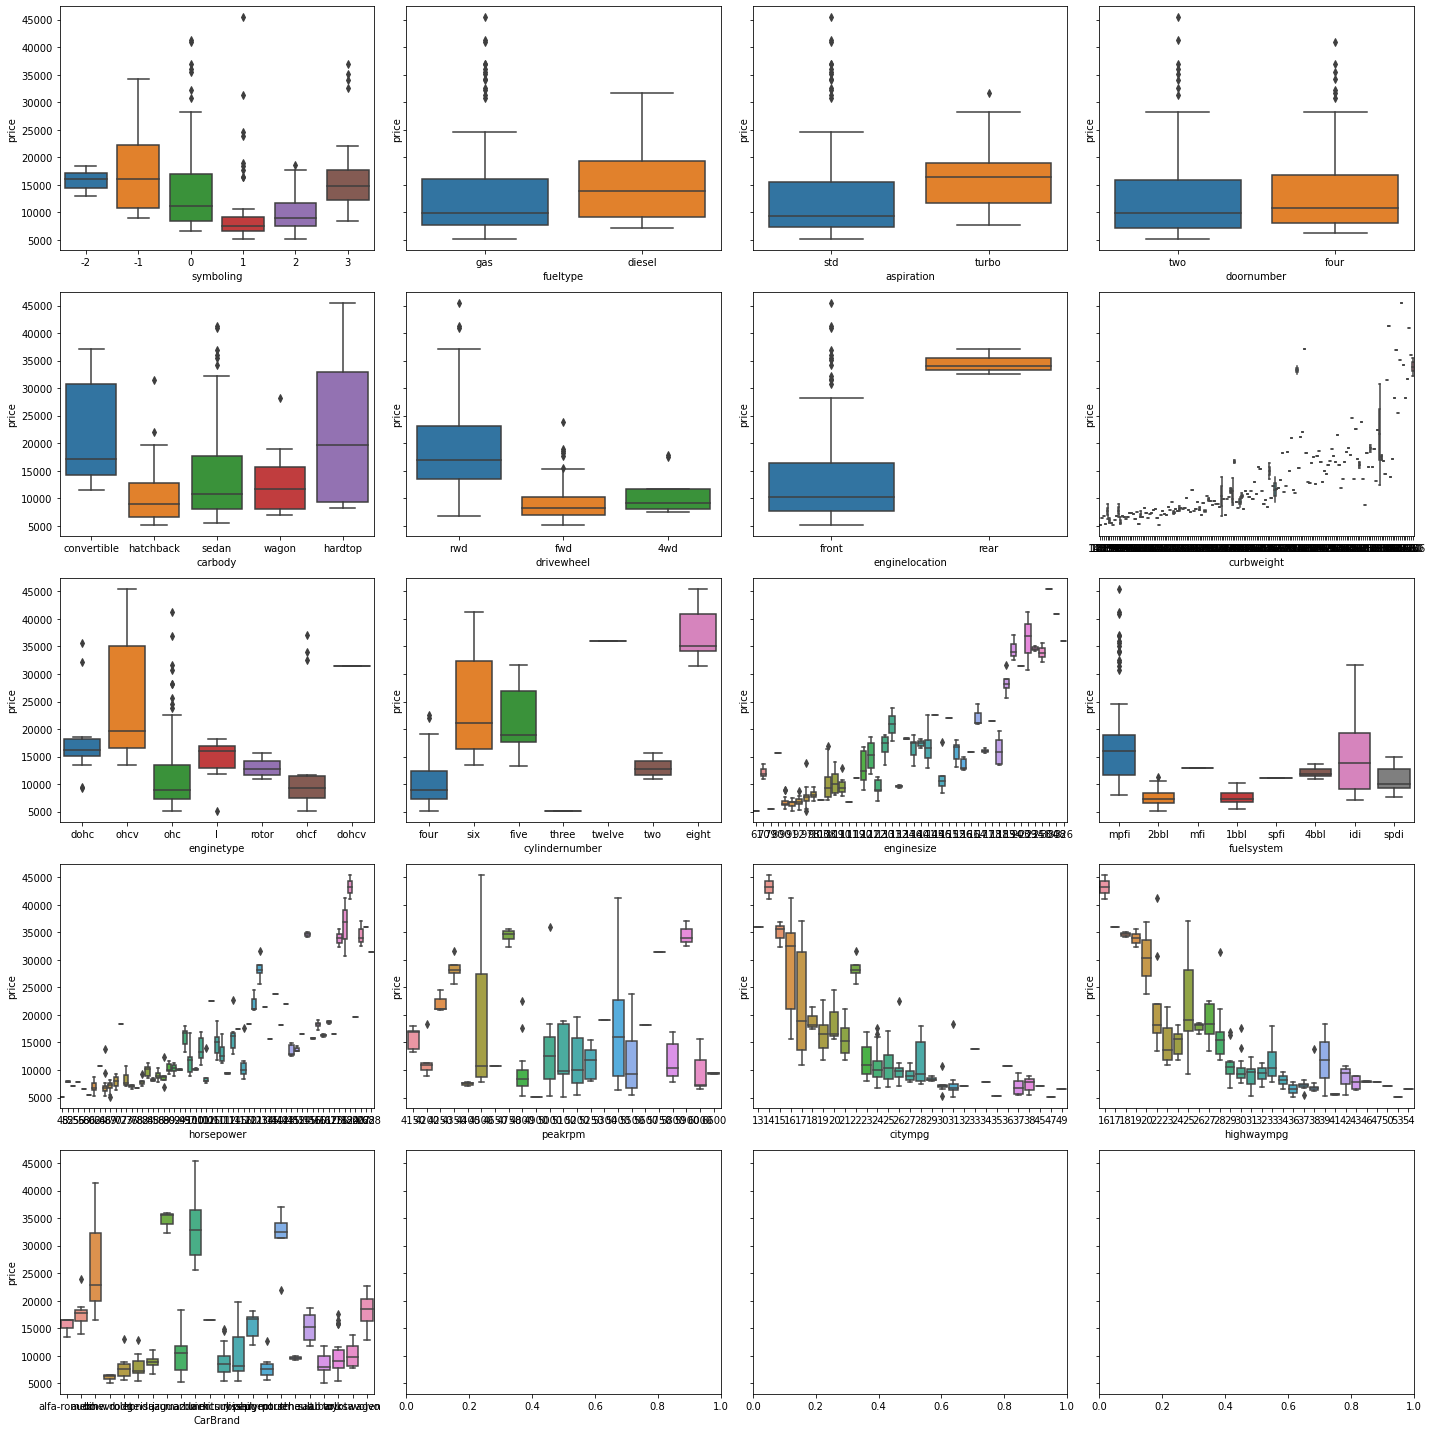

In [57]:
# plt.figure(figsize=(20,20))
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharey = True, figsize=(20,20))
for i, col in enumerate(cat_cols):
    row_index = i // ncols
    col_index = i % ncols
#     print(col_index)
    sns.boxplot(y='price', x=col, data=df, ax=axs[row_index, col_index])
plt.tight_layout()
plt.show()